In [1]:
from rlhfutils.eval_utils import oai_kwargs, load_alldfs, annotate_apfarm, apf_format, load_wgpt, filter_and_sort_df
import pandas as pd
from statistics import mean, stdev
import matplotlib.pyplot as plt
import re
from transformers import AutoTokenizer
from datasets import load_dataset
import openai
from rlhfutils.data import qaform
from transformers import AutoTokenizer
import pandas as pd
from rlhfutils.eval_utils import getapfsft, tok_dist
import matplotlib.pyplot as plt
from rlhfutils.debug_utils import load_rm, progress_rm
import argparse
import nltk
from nltk.tokenize import sent_tokenize
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from plot_utils import fancyscatter

/home/prasann/miniconda3/envs/stackenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/prasann/miniconda3/envs/stackenv/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


[2023-09-28 10:05:24,182] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA SETUP: CUDA runtime path found: /home/prasann/miniconda3/envs/stackenv/lib/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /home/prasann/miniconda3/envs/stackenv/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/home/prasann/miniconda3/envs/stackenv/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/home/prasann/miniconda3/envs/stackenv/lib/libcudart.so'), PosixPath('/home/prasann/miniconda3/envs/stackenv/lib/libcudart.so.11.0')}.. We'll flip a coin and try one of these, in order to fail forward.
Either way, this might cause trouble in the future:
If you get `CUDA error: invalid device function` errors, the above might be the cause and the solution is to make sure only one ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] in the paths that we search based on your env.
  warn(msg)


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#wgs = load_alldfs("../trl-general/genouts/wgpt//", 400, False)
rlcds = load_alldfs("../trl-general/genouts/rlcdlong////", 800, False)
#stacks = load_alldfs("../trl-general/genouts/stack/", 400, False)

generated_rlcdorig.jsonl


In [4]:
rlcds['rlcdsftv3']['question'][0]

KeyError: 'rlcdsftv3'

In [ ]:
# webgpt get stuff for figures
#adfs = load_alldfs("../trl-general/genouts/wgpt//")
tok, rm, kwargs = load_rm("/mnt/data1/prasann/rlhf-exploration/webgpt-llama/models/rewardmodel", 0)
# score_dfs = ['wgptrwscale', 'wgptsft', 'wgptppoorig', 'wgpthkllate', 'wgptthrowlong']
score_dfs = ['wgptsft', 'wgptppoorig', 'wgpthkllate']
for s in score_dfs:
    score_rm(wgs[s], rm)

In [45]:
# stack get stuff for figures
tok, rm, kwargs = load_rm("/mnt/data1/prasann/rlhf-exploration/stack-llama/models/rewardsanity/", 0)
#adfs = load_alldfs("../trl-general/genouts/stack/")
score_dfs = ['stacksft', 'stackorigrerun', 'stackhkl']
for s in score_dfs:
    score_rm(stacks[s], rm)

Loading checkpoint shards:   0%|                                                                                                               | 0/2 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# rlcd get stuff for figures
tok, rm, kwargs = load_rm("/mnt/data1/prasann/rlhf-exploration/rlcd-llama/models/rlcdnormal/", 0)
adfs = load_alldfs("../trl-general/genouts/rlcdfix/")
score_dfs = ['rlcdsftv3', 'rlcdorig', 'rlcdhkl']
for s in score_dfs:
    score_rm(rlcds[s], rm)

In [3]:
rlcdnames = ['rlcdsftv3', 'rlcdorigv3', 'rlcdhkl']
stacknames = ['stacksft', 'stackorigrerun', 'stackhkl']
wgptnames = ['wgptsft', 'wgptppoorig', 'wgpthkllate']

In [4]:
with open('wgptdata.pkl', 'rb') as f:
    wgs = pickle.load(f)
with open('rlcddata.pkl', 'rb') as f:
    rlcds = pickle.load(f)
with open('stackdata.pkl', 'rb') as f:
    stacks = pickle.load(f)

0.8191721534729004
0.19901870727539062
tots
0.038899983190862034
0.04591566100838758
rats
0.047486945236046664
0.2307102766216451
0.8994966372094974
0.6654835325298888
tots
0.5670230487962278
0.4047426283520187
rats
0.6303781752373191
0.6081933039174647
0.9443442134533901
0.6199930481991522
tots
0.27172030778694534
0.2443641750359471
rats
0.28773439167195847
0.394140185516166


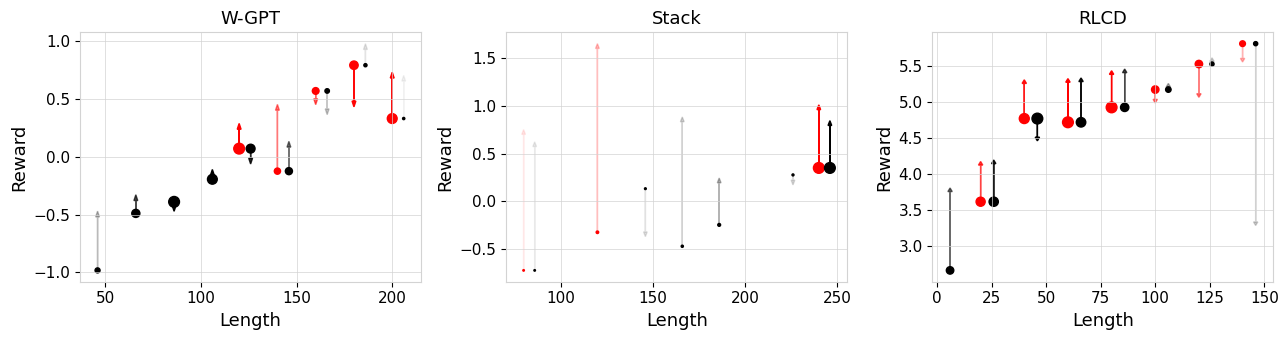

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=False)
# fig.suptitle('Initial Pokemon - 1st Generation')
bwidth = 30
sns.color_palette("deep",8)
hexs = sns.color_palette("deep",8).as_hex()
color_1, color2 = hexs[0], hexs[1]
palette ={'sft': color_1, 'ppo': color2}
fancyscatter(wgptnames, 'W-GPT', wgs, axes[0])
fancyscatter(stacknames, 'Stack', stacks, axes[1])
fancyscatter(rlcdnames, 'RLCD', rlcds, axes[2])
fig.tight_layout()

In [23]:
fig.savefig('fig_3_lengthbins.pdf')

In [16]:
import matplotlib as mp

In [23]:
#plt.savefig("arrows/webgptarrows.pdf", format="pdf", bbox_inches="tight")

0.9443442134533901
0.6199930481991522
tots
0.27172030778694534
0.2443641750359471
rats
0.28773439167195847
0.394140185516166


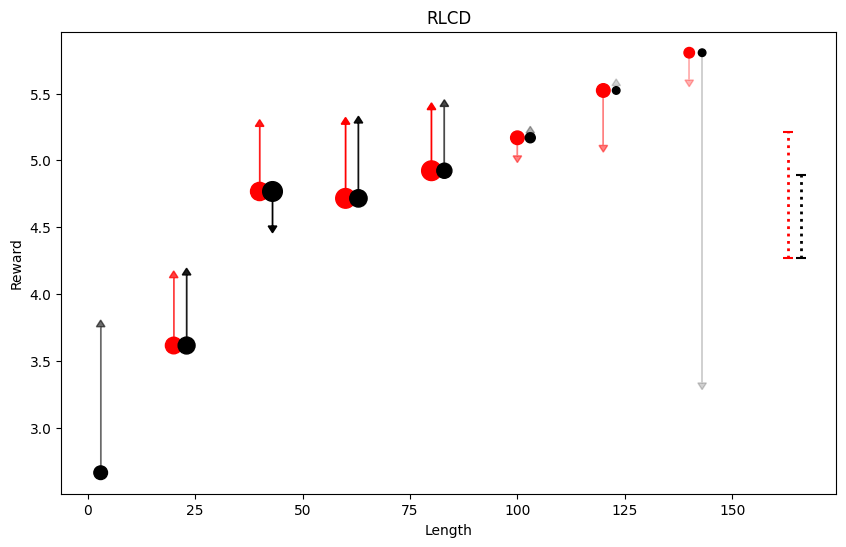

In [77]:
fancyscatter(rlcdnames, 'RLCD', rlcds)
plt.savefig("arrows/rlcdarrows.pdf", format="pdf", bbox_inches="tight")

0.8994966372094974
0.6654835325298888
tots
0.5640851055382163
0.4026455162880186
rats
0.6271119670754678
0.6050420432754053


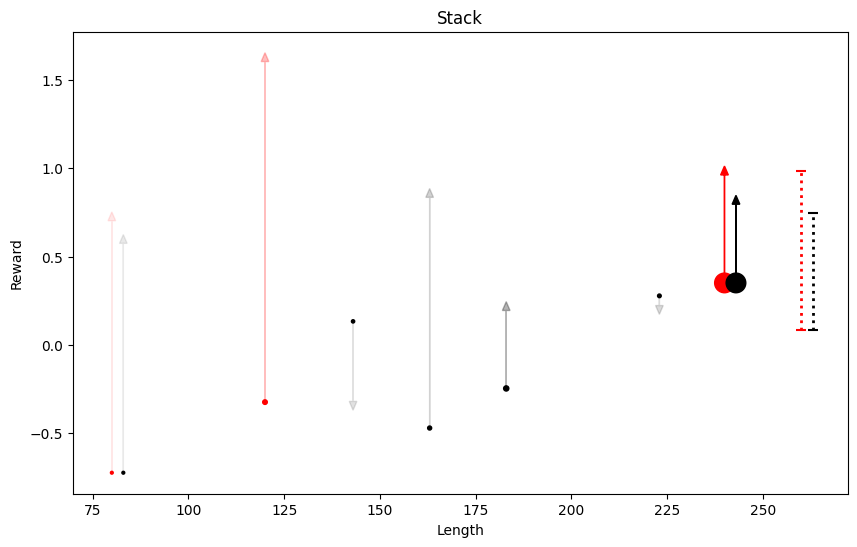

In [75]:
fancyscatter(stacknames, 'Stack', stacks)
plt.savefig("arrows/stackarrows.pdf", format="pdf", bbox_inches="tight")